# CSC 4601 - Final Project 

## Apriori Algorithm - Market Basket Analysis 

**Description:** 

This jupyter notebook implements Apriori algorithm for market basker analysis.

For our implementation of the Apriori algorithm, we followed geeksforgeeks article titled "Implementing Apriori algorithm in Python" and used the corresponding dataset. 

We used the Apriori algorithm to find frequent itemsets (combinations of items that often occur together). For this, we needed to use a minimum support of 0.01 to get common combinations of items. We generated association rules based on the frequent itemsets and through the metrics support, confidence, and lift. Lastly, we used a bar plot to visualize the most purchased items. 


Kelsey Collins and Lauren Dwelley

In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [3]:
#loading dataset into a dataframe 
market_pd = pd.read_csv('Groceries_dataset.csv')
market_data = pd.DataFrame(market_pd)
market_data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#preprocessing the market data 

#check for null values 
print(market_data.isnull().sum().sum())

#fixing date format - goes day, month, year
#from https://www.geeksforgeeks.org/python/how-to-change-the-pandas-datetime-format-in-python/
market_data["Date"] = pd.to_datetime(market_data["Date"], dayfirst=True)
market_data["Date"] = market_data["Date"].dt.strftime('%d-%m-%Y')

# Print the formatted date
#market_data.head()

#check for duplicates 
duplicates = market_data.duplicated(subset=['Member_number', 'Date', 'itemDescription'])
# num_duplicates_list = []
# count = 0
# for i in num_duplicates:
#     count += 1
#     if i == True:
#         num_duplicates_list.append([count, i])
# print(num_duplicates_list[0])
market_data = market_data.drop_duplicates(subset=['Member_number', 'Date', 'itemDescription'], keep='first')

0


In [5]:
#grouped items by transaction
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
basket = market_data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
#print(transactions)

In [6]:
#convert to one-hot format 
#techinally apart of preprocessing
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#run apriori algorithm to find frequent itemsets with items commonly bought together 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])


Total Frequent Itemsets: 69


In [8]:
#generate association rules 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


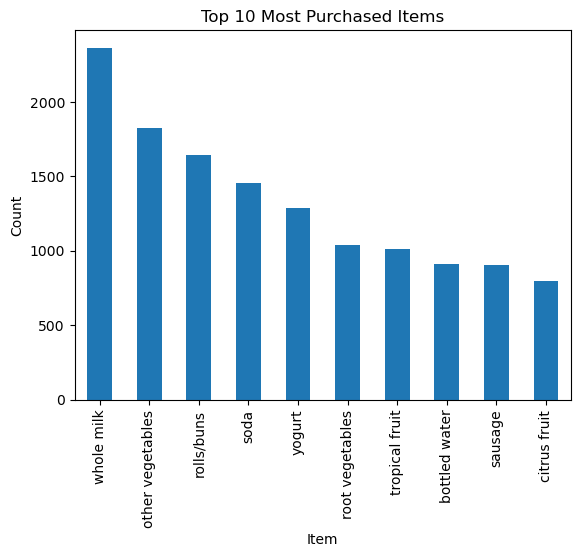

In [9]:
#visualize the most popular items 
#from https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
top_items = market_data['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()